# Ejercicio de Predicción de Precio de Casas

## Autora: Sibyl González
- LinkedIn: [Sibyl González](https://www.linkedin.com/in/sibyl-gonzalez/)
- Repositorio GitHub: [Portfolio de Sibyl González](https://github.com/sibylgonzalez/Portfolio.git)

### Datos
Los datos utilizados en este ejercicio se obtuvieron de Kaggle en la competición [House Prices: Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

### Introducción
En este ejercicio, me propongo comprender paso a paso el proceso de regresión lineal, centrándome en cómo se obtienen los parámetros para minimizar el error. Aunque en este notebook no profundizaré en los detalles matemáticos, se explorarán dos enfoques para obtener la regresión lineal: uno utilizando la ecuación de la recta y otro con la función de numpy.

### Contenido
- Exploración de la regresión lineal
- Dos enfoques para calcular la regresión:
    1. Utilizando la ecuación de la recta
    2. Utilizando la función de numpy

En este ejercicio, se busca no solo aplicar la regresión lineal, sino también comprender los fundamentos detrás de este proceso.



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [9]:
train = pd.read_csv("/home/.../train.csv")
test = pd.read_csv("/home/.../test.csv")

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Desarrollo

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Las columnas de interes para esta regresión lineal son GrLivArea que se refiere al la superficie habitable sobre el nivel del suelo, y la columna objetivo será SalePrice 

In [31]:
train[["GrLivArea", "SalePrice"]]


,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


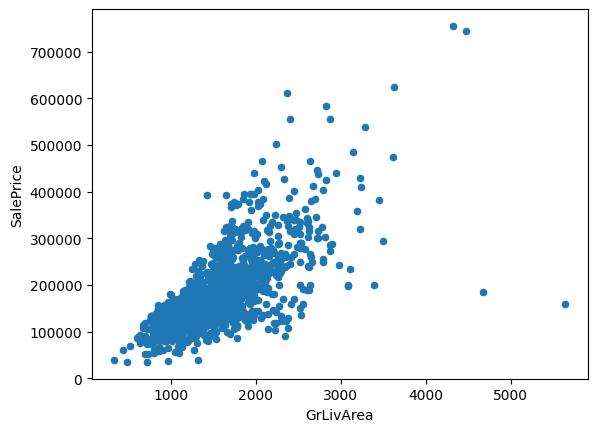

In [14]:
train.plot.scatter(x="GrLivArea", y = "SalePrice" )
plt.show()

In [58]:
#parametros de la recta elegidos para inciar
w = 125
b = 0

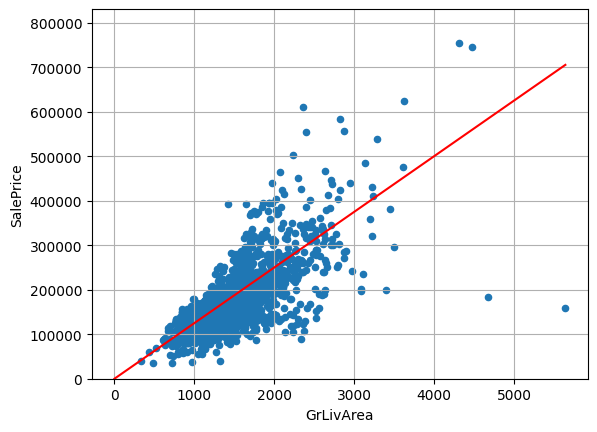

In [29]:
#puntos de la recta
x = np.linspace(0,train["GrLivArea"].max(), 100)
y = w*x+b

#Grafica de la recta
train.plot.scatter(x= "GrLivArea", y ="SalePrice" )
plt.plot(x,y,"-r")
plt.ylim(0, train["SalePrice"].max()*1.1)
plt.grid()
plt.show()

Aquí voy a aprovechar np.polyfit para que me ayude a obtener los coeficientes y ver la diferencia de los parametros que me da vs simplemente tomar un parametro a elección para w y para b, que antes eran 125 y 0 respectivamente, ahora vamos a ver que va a cambiar a w igual a  107.13035896582512 y b o Intercepto igual a 18569.02585648725

In [33]:

# Ajustamos una regresión lineal simple 
coefficients = np.polyfit(train["GrLivArea"], train["SalePrice"], 1)
slope, intercept = coefficients


In [42]:
# Calculate the range of the 'GrLivArea' column
range_grlivarea = max(train["GrLivArea"]) / min(train["GrLivArea"])
range_grlivarea

16.892215568862277

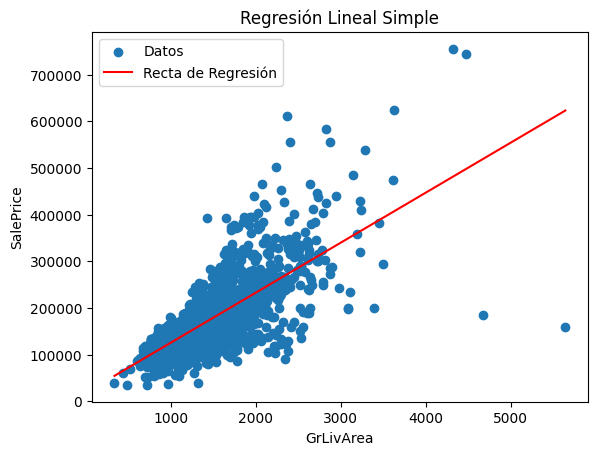

In [44]:

# Creamos un conjunto de puntos para la recta de regresión
x_range = np.linspace(min(train["GrLivArea"]), max(train["GrLivArea"]), 100)
y_predicted = slope * x_range + intercept

# Graficamos los datos y la recta de regresión
plt.scatter(train["GrLivArea"], train["SalePrice"], label='Datos')
plt.plot(x_range, y_predicted, color='red', label='Recta de Regresión')
plt.xlabel('GrLivArea')  # Provide a label for the x-axis
plt.ylabel('SalePrice')  # Provide a label for the y-axis
plt.legend()
plt.title('Regresión Lineal Simple')
plt.show()



In [36]:
print("Pendiente:", slope)
print("Intercepto:", intercept)


Pendiente: 107.13035896582512
Intercepto: 18569.02585648725


Si calculo predicciones con los parametros iniciales w = 125, y b = 0, estos serian los resultados

In [46]:
w = 125
b = 0

In [47]:
train["pred"] = train["GrLivArea"]*w+b

In [49]:
#calculo de la funcion de error
train["diff"] = train["pred"] - train["SalePrice"]
train["cuad"] = train ["diff"]**2
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,213750,5250,27562500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,157750,-23750,564062500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,223250,-250,62500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,214625,74625,5568890625
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,274750,24750,612562500


In [50]:
train["cuad"].mean()

3300407822.406164

Y si lo hago con el calculo de la funcion hecha con numpy seria:

In [59]:
w2 = slope
b2 = intercept


In [60]:
train["pred"] = train["GrLivArea"]*w2+b2

In [61]:
#calculo de la funcion de error
train["diff"] = train["pred"] - train["SalePrice"]
train["cuad"] = train ["diff"]**2
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,201761.939688,-6738.060312,4.540146e+07
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,153767.538871,-27732.461129,7.690894e+08
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,209903.846969,-13596.153031,1.848554e+08
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,202511.852201,62511.852201,3.907732e+09
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,254041.554863,4041.554863,1.633417e+07


In [54]:
train["cuad"].mean()

3139843209.6665273

EL segundo error cuadratico medio parece ser mas pequeño con la ayuda de numpy, pero de igual forma me gustó hacerlo con la ecuasión. Y ahora ¿que hago con eso?

Voy a graficar el error, w en la x y ECM en la y

In [55]:
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns =["w"])
grid_error.head()


,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [56]:
def sum_error(w, train):
    b=0
    train['pred'] = train['GrLivArea']*w+b
    train['diff'] = train['pred']-train['SalePrice']
    train['cuad'] = train['diff']**2
    return(train['cuad'].mean())

In [57]:


grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, train=train))
grid_error.head()



,w,error
0,50.000000,1.509658e+10
1,53.061224,1.404857e+10
2,56.122449,1.304878e+10
3,59.183673,1.209720e+10
4,62.244898,1.119384e+10


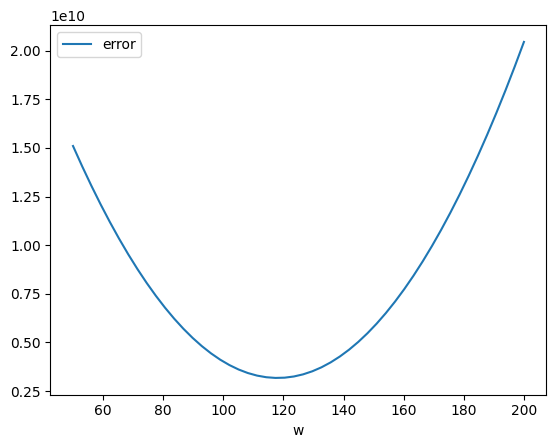

In [62]:
grid_error.plot(x='w',y='error')
plt.show()


In [67]:
# usando sklear para saber los valores optimos
from sklearn.linear_model import LinearRegression

# definiendo input y output
X_train = np.array(train['GrLivArea']).reshape((-1, 1))
Y_train = np.array(train['SalePrice'])

# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")


intercepto (b): 0.0
pendiente (w): [118.06909986]


Hasta este punto, he obtenido el mínimo de la parábola, que es equivalente al error mínimo, el cual es de 118 cuando b = 0. Este valor se corresponde con el mínimo observado en la gráfica.
Dejo este anális hasta aquí y continuare probando otro modelo

